In [1]:
import numpy as np
import pandas as pd
# from utils import get_ctx
import seaborn as sns

In [3]:
context = get_ctx()

# context.close()
# print('Logged out')

Enter username:  STANISLAV.IVANOV_PROG
Enter password:  ········


Connected succesfully!


In [4]:
q0 = open('query.sql', 'r')
sql_stmt = q0.read()
df0 = pd.read_sql(sql_stmt, context)

In [13]:
df0 = pd.read_csv('df0.csv')
df0

,IS_PAU_TODAY,RETENTION_DAY,TIME_SPENT,NB_SESSIONS,PROGRESS_INDEX01,PROGRESS_INDEX02,PROGRESS_INDEX03
0,True,1,25210.0,55,60,17,6
1,False,125,2681.0,4,93,36,124
2,False,1794,36413.0,5,95,36,140
3,False,13,10441.0,15,42,11,5
4,False,103,6352.0,14,52,17,21
...,...,...,...,...,...,...,...
222519,False,2107,2998.0,27,95,36,151
222520,False,25,5938.0,5,43,13,4
222521,False,32,8947.0,19,54,21,12
222522,True,362,15226.0,12,78,33,61


In [23]:
df = df0[:-30000]
df

,IS_PAU_TODAY,RETENTION_DAY,TIME_SPENT,NB_SESSIONS,PROGRESS_INDEX01,PROGRESS_INDEX02,PROGRESS_INDEX03
0,True,1,25210.0,55,60,17,6
1,False,125,2681.0,4,93,36,124
2,False,1794,36413.0,5,95,36,140
3,False,13,10441.0,15,42,11,5
4,False,103,6352.0,14,52,17,21
...,...,...,...,...,...,...,...
995,False,1182,5405.0,2,74,32,44
996,False,754,34160.0,4,79,21,110
997,False,1913,7654.0,6,91,32,136
998,False,0,1591.0,5,2,3,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IS_PAU_TODAY      1000 non-null   bool   
 1   RETENTION_DAY     1000 non-null   int64  
 2   TIME_SPENT        998 non-null    float64
 3   NB_SESSIONS       1000 non-null   int64  
 4   PROGRESS_INDEX01  1000 non-null   int64  
 5   PROGRESS_INDEX02  1000 non-null   int64  
 6   PROGRESS_INDEX03  1000 non-null   int64  
dtypes: bool(1), float64(1), int64(5)
memory usage: 48.0 KB


In [15]:
df['IS_PAU_TODAY'].mean()

0.07301427354511646

In [17]:
np.sum(df['IS_PAU_TODAY'])

14057

In [18]:
def get_pau_prob(data):
    num_pau = np.sum(data)
    return np.random.beta(num_pau + 1, len(data) - num_pau + 1, 1000)

<Axes: ylabel='Density'>

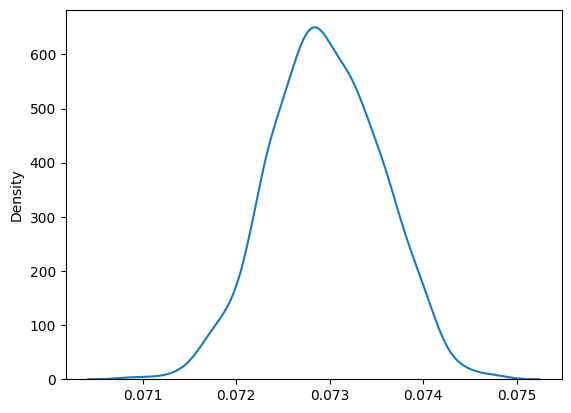

In [19]:
sns.kdeplot(get_pau_prob(df['IS_PAU_TODAY']))

In [20]:
draws = get_pau_prob(df['IS_PAU_TODAY'])
draws

array([0.07208826, 0.07293785, 0.07360345, 0.07291932, 0.07411197,
       0.07260907, 0.07319343, 0.07283719, 0.07179438, 0.07283173,
       0.07296419, 0.0729739 , 0.07280296, 0.07278345, 0.0730161 ,
       0.07354083, 0.07360129, 0.0725183 , 0.07226997, 0.07379687,
       0.07317844, 0.07353214, 0.07292077, 0.07392967, 0.0724288 ,
       0.07373214, 0.07272594, 0.07294255, 0.07209888, 0.07288478,
       0.07260582, 0.07291488, 0.0736455 , 0.07407237, 0.07265049,
       0.07265354, 0.07376258, 0.07257143, 0.07313539, 0.07268724,
       0.07316766, 0.07244002, 0.07347716, 0.07199806, 0.07268844,
       0.07310565, 0.07162598, 0.07333531, 0.07290719, 0.07335577,
       0.07361005, 0.07232711, 0.07399787, 0.07320183, 0.07317482,
       0.07372359, 0.07366512, 0.07312851, 0.07284301, 0.07327374,
       0.07412822, 0.07274013, 0.07269336, 0.07335616, 0.07425051,
       0.0728121 , 0.07327757, 0.07287788, 0.07351221, 0.07295407,
       0.07277025, 0.07261823, 0.07227704, 0.073416  , 0.07353

In [21]:
import arviz as az

az.hdi(draws, hdi_prob = 0.9)

array([0.07195364, 0.07383575])

In [22]:
np.percentile(draws, 90)

0.07373316588183439

In [25]:
import pymc3 as pm
import numpy as np

formula = 'IS_PAU_TODAY ~ RETENTION_DAY + TIME_SPENT + NB_SESSIONS + PROGRESS_INDEX01 + PROGRESS_INDEX02 + PROGRESS_INDEX03'
# formula = 'IS_PAU_TODAY ~ RETENTION_DAY + TIME_SPENT_IN_SECONDS + FIRST_TIME_SPENT_IN_SECONDS + SESSIONS + TIME_SPENT_PER_SESSION + COLLECTION_LEVEL + DIFF_TUTO_MENU + LOADING_TIME_FROM_TRACKING + LOAD_TIME_CALCULATED'
# formula = 'IS_PAU_TODAY ~ RETENTION_DAY + SESSIONS'

# alphas = np.array([1, 1, 1])
# c = np.array([3, 2, 1])

# Create model
with pm.Model() as model:
    pm.GLM.from_formula(formula, data=df)
#     observed_data = pm.Multinomial(
#         'observed_data', n=6, p=parameters, shape=3, observed=c)  
    trace = pm.sample(draws=10000, tune=2000, init="adapt_diag", return_inferencedata=True, chains = 4) # chains = 4

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


AttributeError: module 'pymc' has no attribute 'GLM'

In [81]:
# with model:
#     # Sample from the posterior
#     trace = pm.sample(draws=1000, chains=2, tune=500, 
#                       discard_tuned_samples=True)

array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'RETENTION_DAY'}>,
        <AxesSubplot:title={'center':'RETENTION_DAY'}>],
       [<AxesSubplot:title={'center':'TIME_SPENT'}>,
        <AxesSubplot:title={'center':'TIME_SPENT'}>],
       [<AxesSubplot:title={'center':'NB_SESSIONS'}>,
        <AxesSubplot:title={'center':'NB_SESSIONS'}>],
       [<AxesSubplot:title={'center':'PROGRESS_INDEX01'}>,
        <AxesSubplot:title={'center':'PROGRESS_INDEX01'}>],
       [<AxesSubplot:title={'center':'PROGRESS_INDEX02'}>,
        <AxesSubplot:title={'center':'PROGRESS_INDEX02'}>],
       [<AxesSubplot:title={'center':'PROGRESS_INDEX03'}>,
        <AxesSubplot:title={'center':'PROGRESS_INDEX03'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

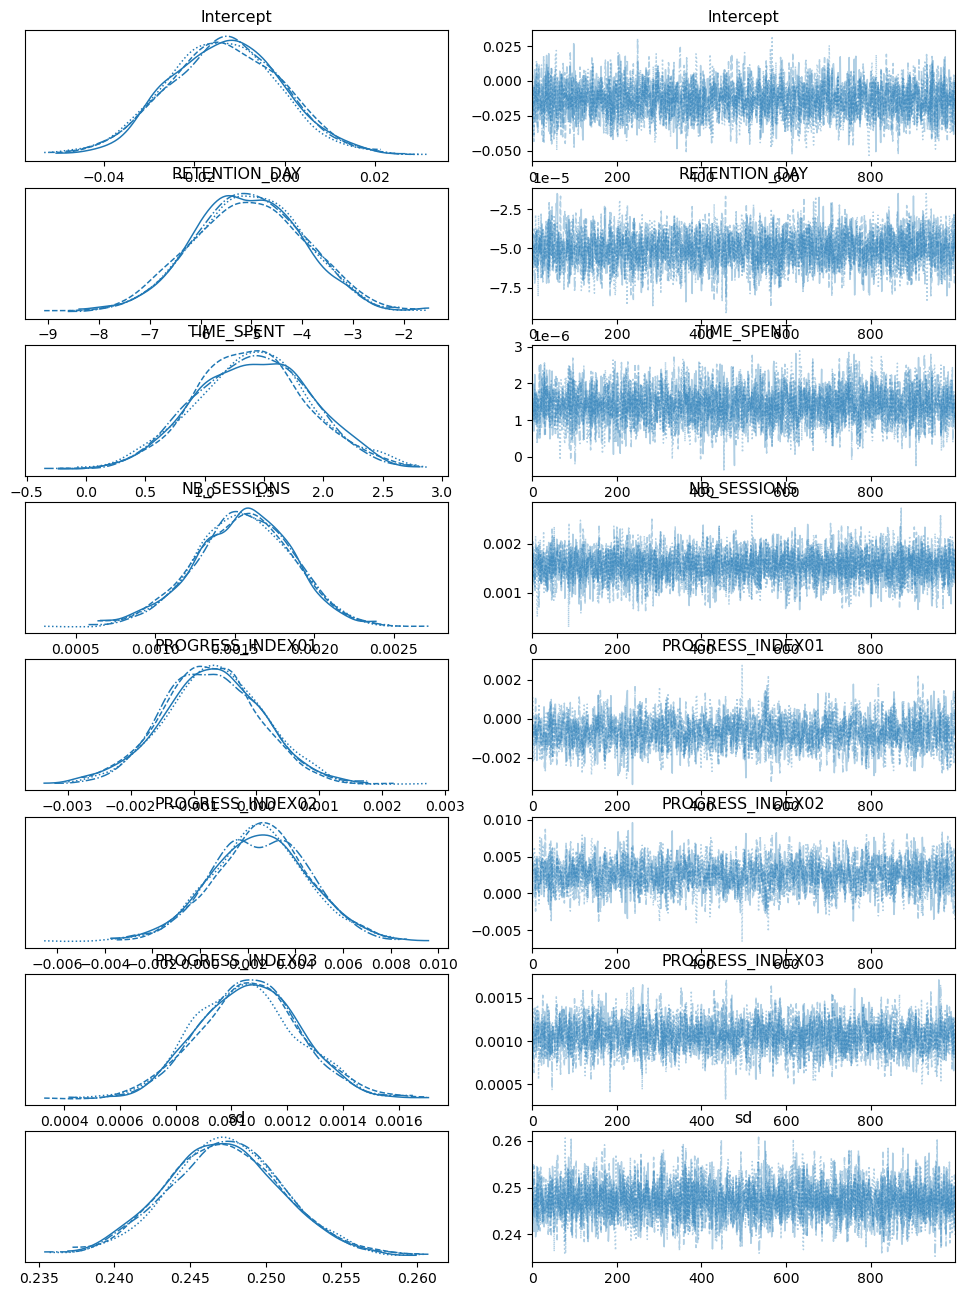

In [117]:
pm.plot_trace(trace)

array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

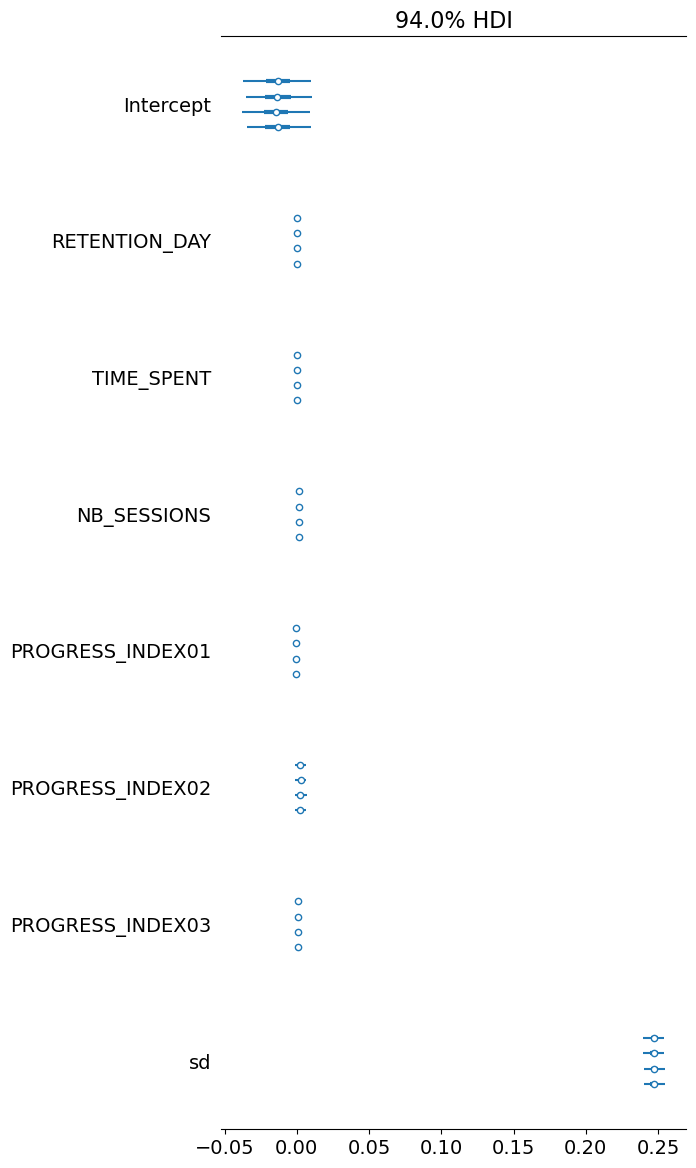

In [118]:
pm.plot_forest(trace)

In [119]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-0.013,0.012,-0.038,0.009,0.0,0.0,3200.0,2401.0,1.0
RETENTION_DAY,-0.000,0.000,-0.000,-0.000,0.0,0.0,2653.0,3031.0,1.0
TIME_SPENT,0.000,0.000,0.000,0.000,0.0,0.0,3215.0,2932.0,1.0
NB_SESSIONS,0.002,0.000,0.001,0.002,0.0,0.0,3877.0,2803.0,1.0
PROGRESS_INDEX01,-0.001,0.001,-0.002,0.001,0.0,0.0,1829.0,2084.0,1.0
PROGRESS_INDEX02,0.003,0.002,-0.001,0.006,0.0,0.0,1771.0,2097.0,1.0
PROGRESS_INDEX03,0.001,0.000,0.001,0.001,0.0,0.0,2348.0,2596.0,1.0
sd,0.247,0.004,0.240,0.255,0.0,0.0,4155.0,3135.0,1.0


In [120]:
test_df = df0[-10000:]

In [121]:
test_df

,IS_PAU_TODAY,RETENTION_DAY,TIME_SPENT,NB_SESSIONS,PROGRESS_INDEX01,PROGRESS_INDEX02,PROGRESS_INDEX03
212524,False,531,7477.0,20,95,36,114
212525,False,1759,24584.0,4,95,36,168
212526,False,1941,20730.0,24,88,33,85
212527,False,4,26445.0,11,48,13,4
212528,False,1794,22580.0,8,95,36,175
...,...,...,...,...,...,...,...
222519,False,2107,2998.0,27,95,36,151
222520,False,25,5938.0,5,43,13,4
222521,False,32,8947.0,19,54,21,12
222522,True,362,15226.0,12,78,33,61


In [122]:
# Making predictions
with pm.Model() as model:
    pm.GLM.from_formula(formula, data=test_df)
    posterior_predictive = pm.fast_sample_posterior_predictive(trace)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/


In [123]:
posterior_predictive['y']

array([[ 0.28576306,  0.47785292, -0.08082684, ..., -0.10310593,
         0.35721093,  0.23593282],
       [ 0.2904    ,  0.13005392,  0.44481041, ..., -0.13036427,
         0.07690265,  0.21692682],
       [-0.02398012,  0.50996283,  0.23938283, ..., -0.43538304,
         0.00138917,  0.01977914],
       ...,
       [ 0.38799181,  0.20780525,  0.20608081, ..., -0.24396444,
         0.08169692,  0.26183826],
       [-0.15461231,  0.50753535, -0.04231786, ...,  0.22635029,
        -0.10246884,  0.46227804],
       [ 0.33679274,  0.52058668, -0.04272476, ...,  0.67777394,
         0.38106552,  0.1929523 ]])

<AxesSubplot:title={'center':'x'}>

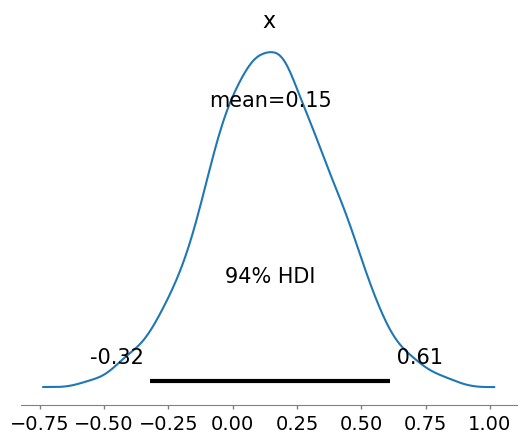

In [124]:
pm.plot_posterior(posterior_predictive['y'][:,0])